In [1]:
%matplotlib inline

import time
import random

import numpy as np

from matplotlib import pyplot

import torch
from torch.utils.data import DataLoader, random_split

from utils.torchutils import ImageListDataset, UNet

In [2]:
#https://github.com/majedelhelou/denoising_datasets
data_path = 'denoising_datasets-main/Set14'

In [3]:
images_dataset = ImageListDataset(data_path, std=0.5, size=256, mode='L')

In [4]:
fold = 4

len_trainset = (fold-1)*len(images_dataset)//fold
len_testset = len(images_dataset) - len_trainset

train_dataset, test_dataset = random_split(
    images_dataset, 
    [len_trainset, len_testset]
)

In [5]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=True
)

In [6]:
#net = ConvNet()
net = UNet([1,64,128], n_classes=1, double_conv=True)

In [18]:
criterion = torch.nn.MSELoss()
#criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(net.parameters())

In [19]:
print('Doing one iteration through train set as a sanity check.')

tic = time.perf_counter()
net.train_test_epoch(train_dataloader, optimizer, criterion, grad_enabled=False)
toc = time.perf_counter()

print(f'Took {toc-tic : 0.4f}s for 1 epoch of {len(train_dataset)} images.')

Doing one iteration through train set as a sanity check.
Took  2.1729s for 1 epoch of 10 images.


In [20]:
net.fit(train_dataloader, test_dataloader, optimizer, criterion, n_epochs=20, patience=20)

epoch: 0. Train loss: 0.04631048068404198. Test loss: 0.34612900018692017
    Saving checkpoint at epoch: 0
epoch: 1. Train loss: 0.18413496017456055. Test loss: 0.07862631976604462
    Saving checkpoint at epoch: 1
epoch: 2. Train loss: 0.06550493836402893. Test loss: 0.10770492255687714
epoch: 3. Train loss: 0.05863102525472641. Test loss: 0.1656169593334198
epoch: 4. Train loss: 0.06043519452214241. Test loss: 0.33798447251319885
epoch: 5. Train loss: 0.05973054841160774. Test loss: 0.4931037425994873
epoch: 6. Train loss: 0.05598990246653557. Test loss: 0.398232102394104
epoch: 7. Train loss: 0.05204557254910469. Test loss: 0.21437841653823853
epoch: 8. Train loss: 0.05274694412946701. Test loss: 0.1345546543598175
epoch: 9. Train loss: 0.05314952880144119. Test loss: 0.11078737676143646
epoch: 10. Train loss: 0.05105528235435486. Test loss: 0.10528962314128876
epoch: 11. Train loss: 0.04919879138469696. Test loss: 0.09637834876775742
epoch: 12. Train loss: 0.049066491425037384. Te

In [23]:
input, target = random.choice(train_dataset)
net.eval()

with torch.no_grad():
    output = net(input[None,:])[0,:]

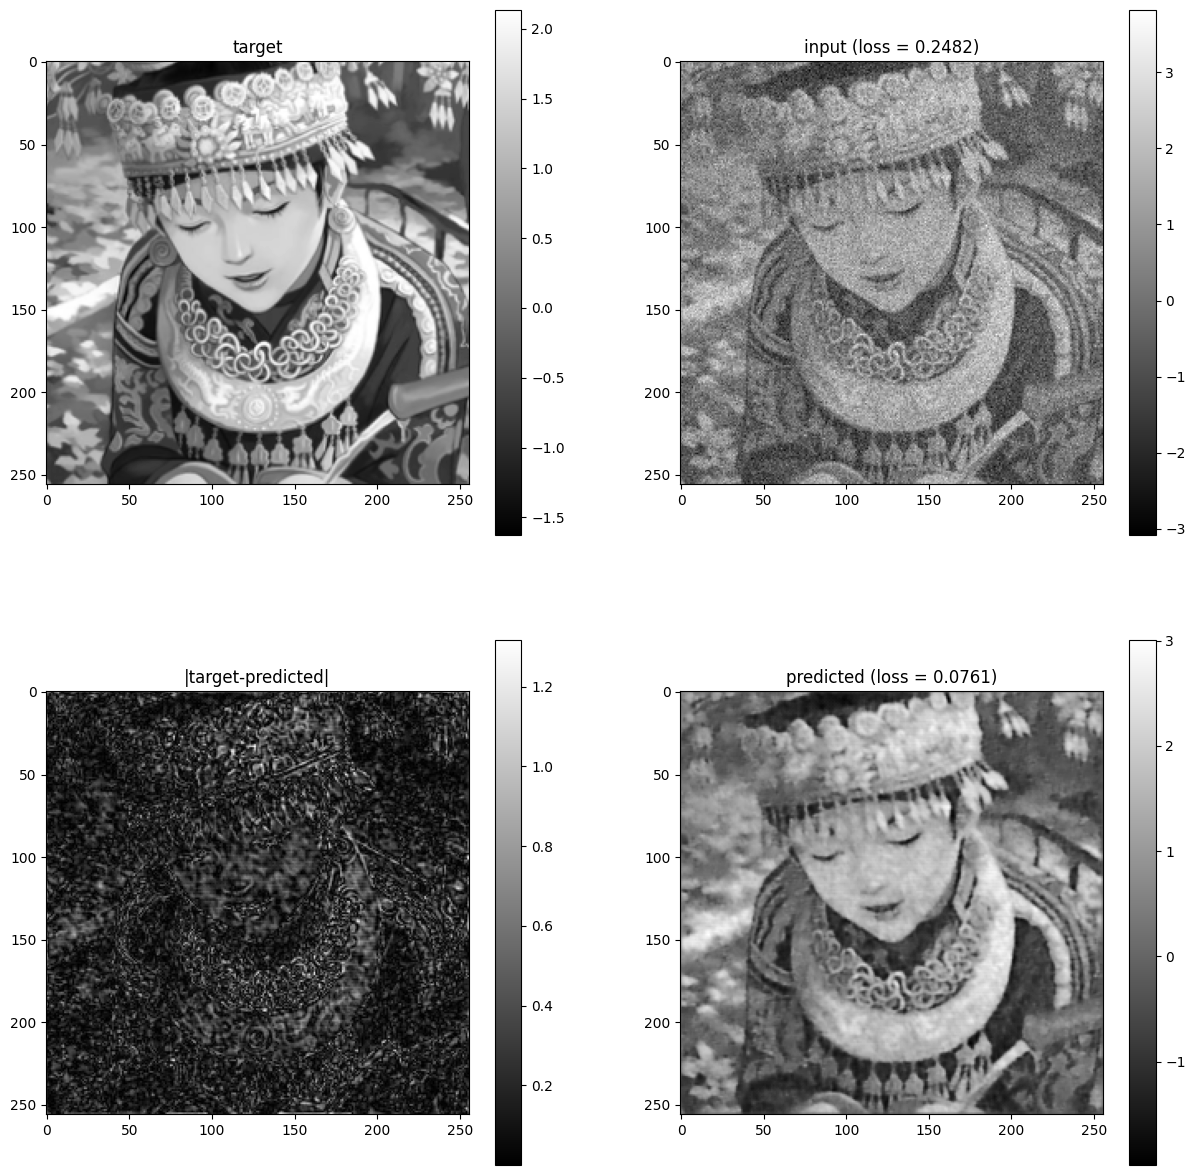

In [24]:
pyplot.figure(figsize=(15,15))

pyplot.subplot(2,2,1)
pyplot.imshow(torch.permute(target,(1,2,0)),cmap='gray')
pyplot.colorbar()
pyplot.title('target')

pyplot.subplot(2,2,2)
pyplot.imshow(torch.permute(input,(1,2,0)),cmap='gray')
pyplot.colorbar()
pyplot.title(f'input (loss ={criterion(input, target).item() : 0.4f})')

pyplot.subplot(2,2,3)
pyplot.imshow(torch.permute(abs(target-output),(1,2,0)),cmap='gray')
pyplot.colorbar()
pyplot.title('|target-predicted|')

pyplot.subplot(2,2,4)
pyplot.imshow(torch.permute(output,(1,2,0)),cmap='gray')
pyplot.colorbar()
pyplot.title(f'predicted (loss ={criterion(output, target).item() : 0.4f})')

pyplot.show()

